In [1]:
from FADS_SRP.models import compiled_autoencoder, supervised_autoencoder
from FADS_SRP.input import sorted_listdir, get_dsets_
from FADS_SRP.thresholding import manhattan_plot
from time import sleep
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P = "/home/shussain/Simulated_data/11042021/simulation_output1"
dset = get_dsets_(f"{P}")#dsets = sorted_listdir(P)

/home/shussain/Simulated_data/11042021/simulation_output1 True


In [4]:
P = "/home/shussain/Simulated_data/11042021/simulation_output1"
dset = get_dsets_(f"{P}")#dsets = sorted_listdir(P)

sizes = [1000, 750, 500, 250, 100, 50, 20, 10, 5]
rws = [0, 0.4, 0.6, 1]

w1 = []
size = 300
for rw in tqdm(rws):
    hist, model = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[size], 
                                         input_shape=1000, reconstruction_weight=rw, dropout=True, activation="relu")
    for i in hist.history.keys():
        if i.startswith("val_clf_auc"):
            key = i
            
    print(hist.history[i][-1])
    
    w = model.layers[1].get_weights()
    w1.append(w[0])
    

  0%|          | 0/4 [00:00<?, ?it/s]

/home/shussain/Simulated_data/11042021/simulation_output1 True


 25%|██▌       | 1/4 [00:55<02:45, 55.09s/it]

0.8170125484466553


 50%|█████     | 2/4 [01:50<01:50, 55.20s/it]

0.8246437311172485


 75%|███████▌  | 3/4 [02:45<00:55, 55.28s/it]

0.8177437782287598


100%|██████████| 4/4 [03:41<00:00, 55.26s/it]

0.5056437849998474


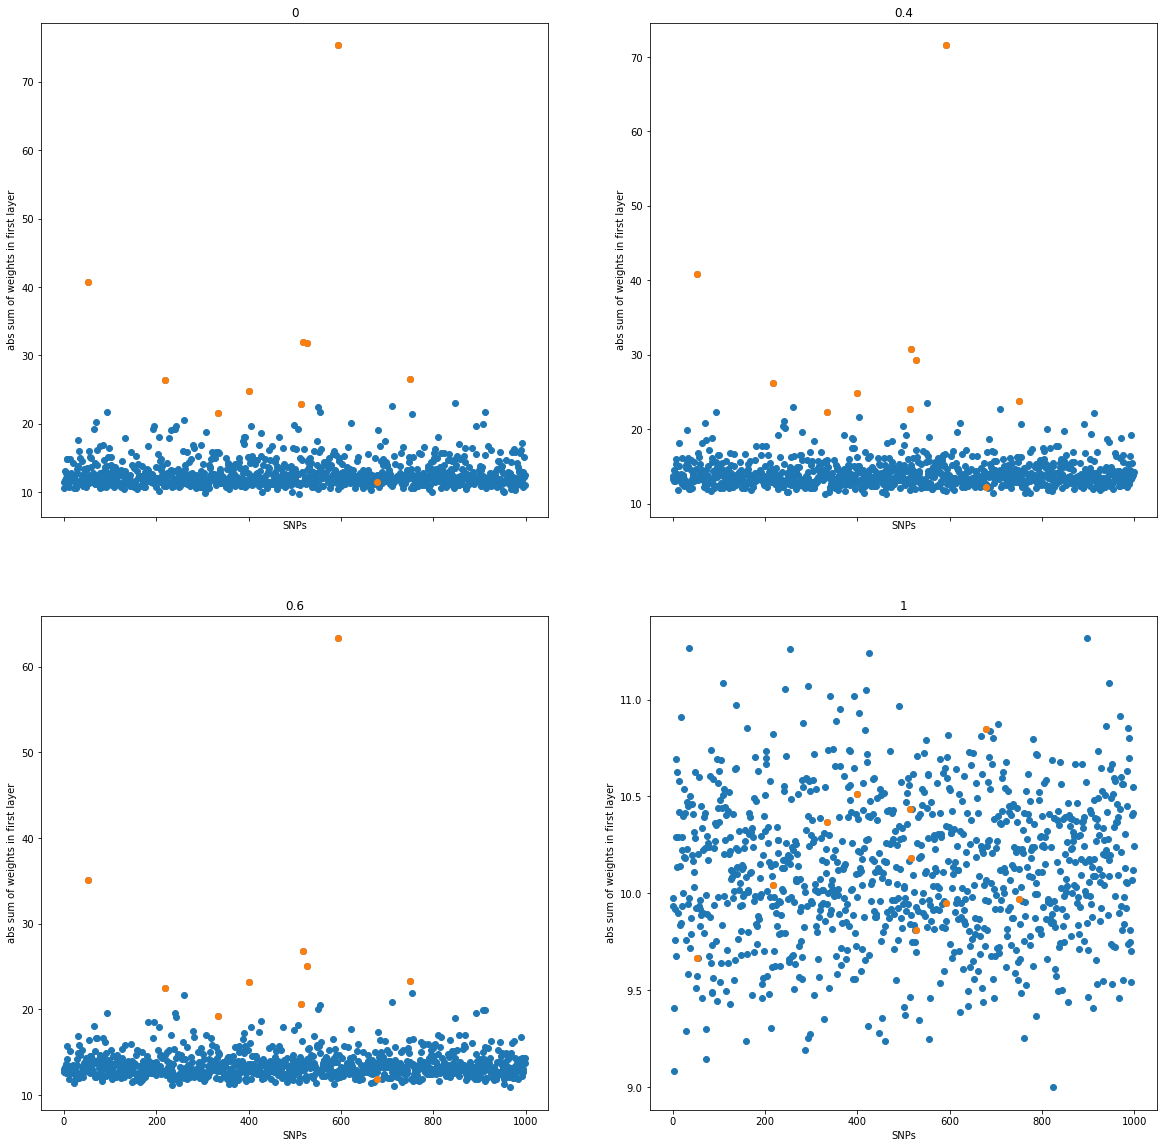

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True)

for ax, w, rw in zip(axes.ravel(), w1, rws):
    ax.scatter(np.arange(1000), np.sum(np.abs(w), axis=1))
    cas = dset["ct"].query("causal == 1").index
    ax.scatter(cas, np.sum(np.abs(w), axis=1)[cas,])
    ax.set_title(f"{rw}")
    ax.set_xlabel("SNPs")
    ax.set_ylabel("abs sum of weights in first layer")

plt.savefig("AE_tresh.jpeg")

NameError: name 'w1' is not defined

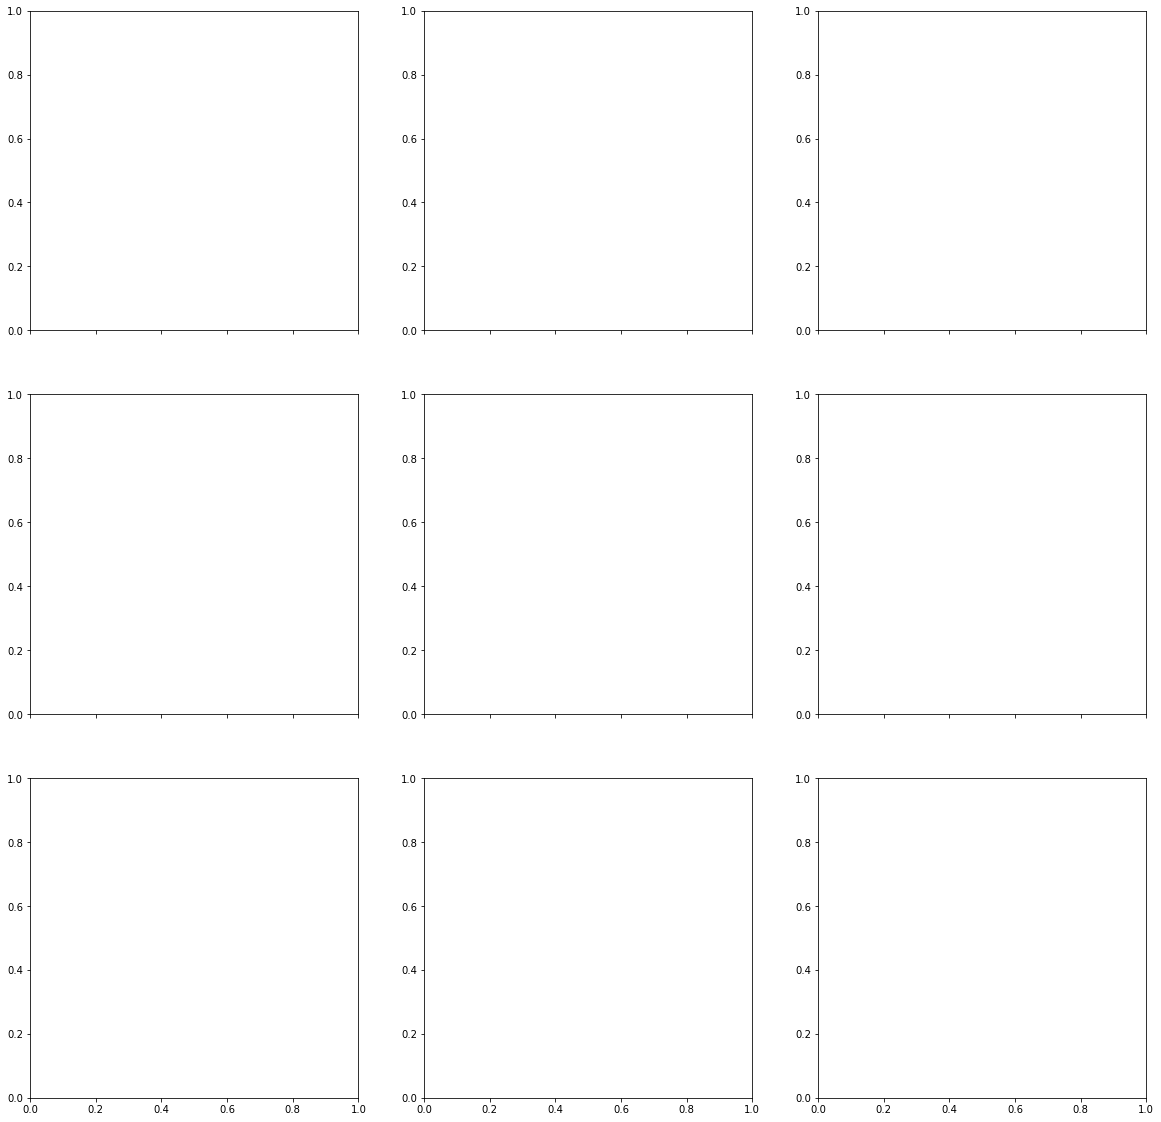

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharex=True)

for ax, w, k in zip(axes.ravel(), w1, sizes):
    ax.scatter(np.arange(1000), np.sum(np.abs(w), axis=1))
    cas = dset["ct"].query("causal == 1").index
    ax.scatter(cas, np.sum(np.abs(w), axis=1)[cas,])
    ax.set_title(f"{k}")
    ax.set_xlabel("SNPs")
    ax.set_ylabel("abs sum of weights in first layer")

plt.savefig("AE_tresh.jpeg")

In [47]:
np.sum(w1[-1])

604.13965

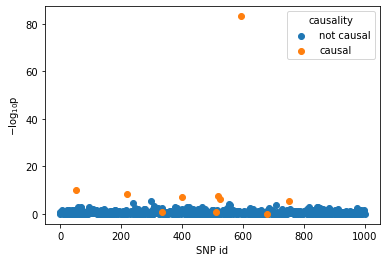

In [17]:
manhattan_plot(dset["ct"])
plt.savefig("manhattan.jpeg")

In [4]:
size=300
hist, model = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[size], 
                                     input_shape=1000, reconstruction_weight=0, dropout=True, activation="relu")
for i in hist.history.keys():
    if i.startswith("val_clf_auc"):
        key = i

print(hist.history[i][-1])
w = model.layers[1].get_weights()

0.8142874836921692


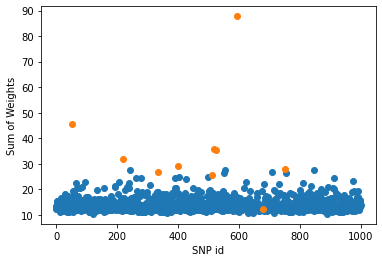

In [11]:
from FADS_SRP.thresholding import ae_thresh_plot

ae_thresh_plot(ae_ct(dset["ct"], model))

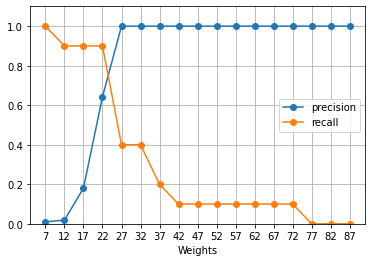

In [9]:
from FADS_SRP.thresholding import ae_plot_thresholding_metrics, ae_ct

ae_plot_thresholding_metrics(ae_ct(dset["ct"], model), thresh_range=(7, 90), step_size=5)

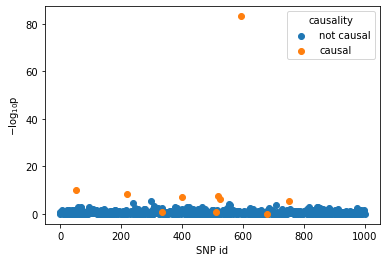

In [12]:
manhattan_plot(dset["ct"])

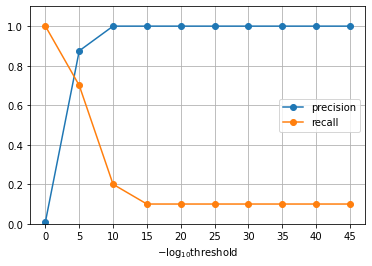

In [6]:
from FADS_SRP.thresholding import plot_thresholding_metrics, ae_get_SNPs

plot_thresholding_metrics(dset["ct"])

In [10]:
ae_get_SNPs(ae_ct(dset["ct"], model),  17)

array([ 53,  64,  70,  71,  79,  84,  93, 133, 192, 194, 206, 218, 227,
       232, 238, 240, 243, 261, 297, 307, 334, 388, 390, 392, 400, 404,
       427, 450, 465, 499, 506, 513, 517, 526, 549, 551, 555, 593, 622,
       681, 710, 734, 750, 754, 804, 811, 847, 892, 907, 912])

In [13]:
ae_ct(dset["ct"], model).query("weights > 22")

,Unnamed: 0,SNP,causal,logistic_p,weights
53,53,SNP_54,1,8.595487e-11,40.833900
218,218,SNP_219,1,3.112079e-09,26.306799
334,334,SNP_335,1,2.093718e-01,22.775272
400,400,SNP_401,1,6.730473e-08,23.942253
513,513,SNP_514,1,1.310851e-01,23.110497
517,517,SNP_518,1,3.947185e-08,32.712738
526,526,SNP_527,1,6.259923e-07,32.542477
551,551,SNP_552,0,9.031706e-02,24.034859
555,555,SNP_556,0,1.951121e-02,22.199337
593,593,SNP_594,1,6.344854e-84,75.255653
